# Rainfall record processing and visualization

© 2024 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/irrigation_and_drainage_eng/blob/main/notebooks/rainfall_record_processing.ipynb).


## Required modules and global setup for plots

In [1]:
import os
import subprocess
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    subprocess.run('pip install ipympl', shell=True);
    from google.colab import output, files
    output.enable_custom_widget_manager()
else:
    import tkinter as tk
    from tkinter.filedialog import askopenfilename

# Figures setup
%matplotlib widget
# plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "DejaVu Serif",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

## Loading the rainfall record

In [2]:
if 'google.colab' in str(get_ipython()):
    file = files.upload()
    df = pd.read_excel(list(file.values())[0])
else:
    tk.Tk().withdraw() # part of the import if you are not using other tkinter functions
    file = askopenfilename()
    df = pd.read_excel(file)
df

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,14a15,15a16,16a17,17a18,18a19,19a2,2a21,21a22,22a23,23a24
0,1972,Enero,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1972,Enero,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,1972,Enero,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,1972,Enero,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,1972,Enero,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.3,0.1,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,1999,Diciembre,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10223,1999,Diciembre,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10224,1999,Diciembre,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10225,1999,Diciembre,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


## Creating a field with the date properly formatted 

In [3]:
months_two_parse = {
    "Enero": "January",
    "Fbrero": "February",
    "Marzo": "March",
    "Abril": "April",
    "Mayo": "May",
    "Junio": "June",
    "Julio": "July",
    "Agosto": "August",
    "Septiembre": "September",
    "Octubre": "October",
    "Noviembre": "November",
    "Diciembre": "December",
}

In [4]:
# Create a field with the date
df_date = pd.DataFrame({'year': df['Año'],
                        'month': pd.to_datetime(df['Mes'].map(months_two_parse), format='%B').dt.month,
                        'day': df['Dias']})
df['date'] = pd.to_datetime(df_date)

# Create a field with the daily_rain rainfall
df['daily_rain'] = df.iloc[:, 3:3+24].sum(axis=1, numeric_only=True)
df.head()

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,16a17,17a18,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain
0,1972,Enero,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1972-01-01,0.0
1,1972,Enero,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1972-01-02,0.0
2,1972,Enero,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1972-01-03,0.0
3,1972,Enero,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1972-01-04,0.0
4,1972,Enero,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0,0.0,0.0,0.0,0.0,0.0,0,1972-01-05,1.4


## Get the data for a spefic date

In [5]:
date = '1972-01-27'

df_day = df.loc[df['date'] == date]
df_day

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,16a17,17a18,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain
26,1972,Enero,27,2.6,4.5,1.3,2.7,1.4,0.2,0.9,...,0.0,0,0.0,0.1,0.0,0.0,0.0,0,1972-01-27,19.4


## Get the data for a range of dates

In [6]:
date_ini = '1972-03-01'
date_end = '1972-06-29'

df_range = df.loc[(df['date'] >= date_ini) & (df['date'] <= date_end)].copy()
df_range['cumulative'] = np.cumsum(df_range['daily_rain'])
df_range.head()

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,17a18,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain,cumulative
60,1972,Marzo,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1972-03-01,13.8,13.8
61,1972,Marzo,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.3,0,1972-03-02,7.0,20.8
62,1972,Marzo,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1972-03-03,0.0,20.8
63,1972,Marzo,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1972-03-04,0.0,20.8
64,1972,Marzo,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1972-03-05,0.9,21.7


## Plot the data between the range of dates

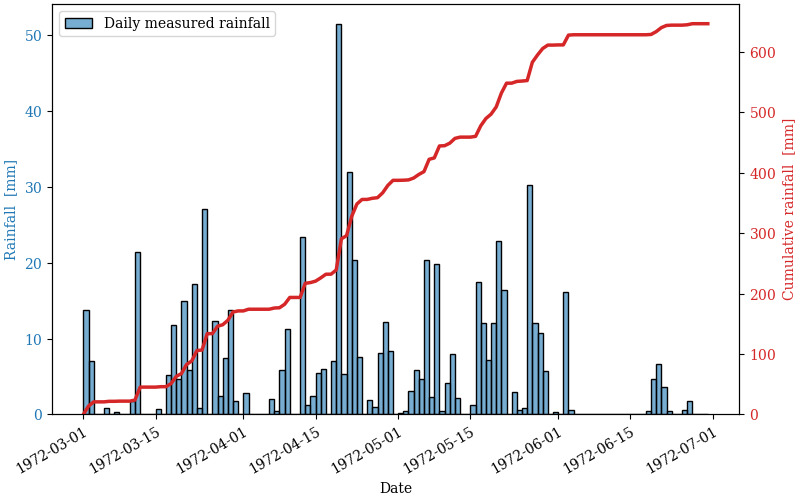

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

# Daily rainfall
ax1.bar(df_range['date'], df_range['daily_rain'], color=mpl.colors.to_rgba('C0', 0.6), edgecolor='k', width=1, align='edge',
        label='Daily measured rainfall')

# Cumulative rainfall as a line plot considering the edges of the daily rainfall
date_range = pd.date_range(df_range.iloc[0].date,
                           df_range.iloc[0].date + datetime.timedelta(days=len(df_range)), freq='1D')
cummulative_rainfall = np.hstack((0, df_range['cumulative']))
ax2.plot(date_range, cummulative_rainfall, color='C3', lw=2.5)

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall  [mm]', color='C0')
ax2.set_ylabel('Cumulative rainfall  [mm]', color='C3')
ax2.set_ylim(0, ax2.get_ylim()[1])

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.setp(ax2.get_yticklabels(), color='C3')
plt.show()

## Recompute and plot the record averaging every $n$ days

In [8]:
n_days = 7

df_range_avg = df_range.iloc[n_days-1::n_days-1].copy()
df_range_avg['avg'] = np.diff(df_range_avg['cumulative'], prepend=0) / n_days
df_range_avg['avg_cumulative'] = df_range_avg['avg'].cumsum() * n_days
# Create a field with the start date of the range (left edges)
df_range_avg['start_date'] = df_range_avg['date'] - datetime.timedelta(days=n_days-1)
df_range_avg.head()

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,2a21,21a22,22a23,23a24,date,daily_rain,cumulative,avg,avg_cumulative,start_date
66,1972,Marzo,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1972-03-07,0.3,22.0,3.142857,22.0,1972-03-01
72,1972,Marzo,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1972-03-13,0.0,45.2,3.314286,45.2,1972-03-07
78,1972,Marzo,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1972-03-19,4.7,67.6,3.200000,67.6,1972-03-13
84,1972,Marzo,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1972-03-25,0.0,133.7,9.442857,133.7,1972-03-19
90,1972,Marzo,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1972-03-31,0.0,171.3,5.371429,171.3,1972-03-25


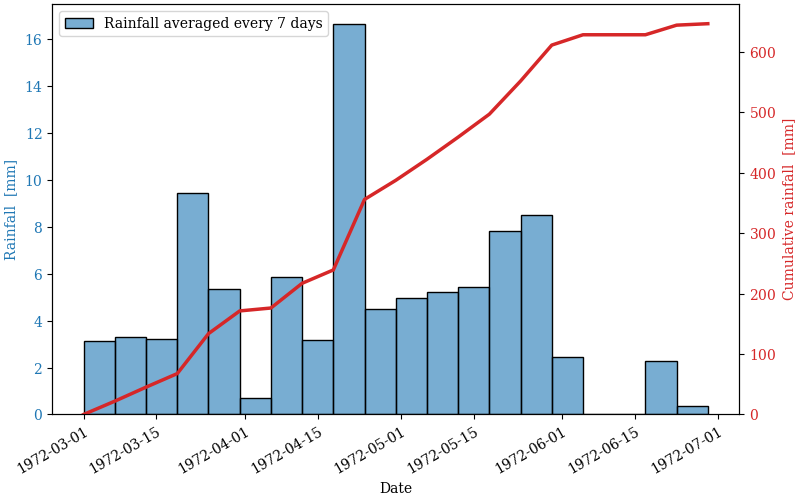

In [9]:
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

# Rainfall averaged every n_days days as a bar plot
ax1.bar(df_range_avg['start_date'], df_range_avg['avg'], color=mpl.colors.to_rgba('C0', 0.6), edgecolor='k', width=n_days-1, align='edge',
        label=f'Rainfall averaged every {n_days} days')

# Cumulative rainfall as a line plot considering the edges of the averaged rainfall
date_range = pd.date_range(df_range_avg.iloc[0].start_date, df_range_avg.iloc[-1].date, freq=f'{n_days-1}D')
cummulative_rainfall = np.hstack((0, df_range_avg['cumulative']))
ax2.plot(date_range, cummulative_rainfall, color='C3', lw=2.5)

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall  [mm]', color='C0')
ax2.set_ylabel('Cumulative rainfall  [mm]', color='C3')
ax2.set_ylim(0, ax2.get_ylim()[1])

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.setp(ax2.get_yticklabels(), color='C3')
plt.show()